In [1]:
from scipy.io import loadmat
import numpy as np
from nilearn import *
import nilearn
import matplotlib.pyplot as plt

In [2]:
# Set parameters

subjects = ["303","378","386","820","1092","1093","1171","1352","1511","1629"]
S = len(subjects)

methods = ['Sim','Pear','Spar']
M = len(methods)

bands = ['LPF','BPF','HPF']
B = len(bands)

Graphs303_Sparsity = loadmat('../normalize_graphs/normalized_graphs/303_normalizedGraphs.mat')
Graphs303Spar_out = Graphs303_Sparsity['graphOut']
Graphs303Spar = Graphs303Spar_out['Spar'][0][0]

N,_,T = Graphs303Spar.shape

In [3]:
# Read MOVIE 1 graphs

Graphs_M1 = np.zeros((N,N,T,S,M))
Data_M1 = np.zeros((N,T,B,S,M))

for s in range(S):
    subject = subjects[s]

    s1 = '../normalize_graphs/normalized_graphs/'
    s2 = '_normalizedGraphs.mat'
    sub = s1 + subject + s2

    temp = loadmat(sub)
    temp_extracted = temp['graphOut']
    
    for m in range(M):
        method = methods[m]
        
        Graphs_M1[:,:,:,s,m] = temp_extracted[method][0][0]

for s in range(S):
    subject = subjects[s]

    s1 = './gft/'
    s2 = '_GFTFiltered.mat'
    sub = s1 + subject + s2

    temp = loadmat(sub)

    for m in range(M):
        method = methods[m]

        temp_extracted = temp[method]

        for b in range(B):
            band = bands[b]
            
            Data_M1[:,:,b,s,m] = temp_extracted[band][0][0]

# Read Resting State data

Graphs_RS = np.zeros((N,N,S,M))
Data_RS = np.zeros((N,B,S,M))

for s in range(S):
    subject = subjects[s]

    s1 = '../normalize_graphs/normalized_graphs/'
    s2 = '_normalizedGraphs_RS.mat'
    sub = s1 + subject + s2

    temp = loadmat(sub)
    temp_extracted = temp['graphOut']
    
    for m in range(M):
        method = methods[m]
        
        Graphs_RS[:,:,s,m] = temp_extracted[method][0][0]

for s in range(S):
    subject = subjects[s]

    s1 = './gft/'
    s2 = '_GFTFiltered_RS.mat'
    sub = s1 + subject + s2

    temp = loadmat(sub)

    for m in range(M):
        method = methods[m]

        temp_extracted = temp[method]

        for b in range(B):
            band = bands[b]
            
            Data_RS[:,b,s,m] = np.squeeze(temp_extracted[band][0][0][:])

C:\Users\sasan\AppData\Local\Temp\ipykernel_27620\3923399969.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  Graphs_M1[:,:,:,s,m] = temp_extracted[method][0][0]
C:\Users\sasan\AppData\Local\Temp\ipykernel_27620\3923399969.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  Data_M1[:,:,b,s,m] = temp_extracted[band][0][0]


In [4]:
layouts = loadmat('../extract_data/nodeLayout.mat')
layout = layouts['locs']

node = np.array([4001, 4002, 4201, 4202, 6221, 6222, 2301, 2302, 2321, 2322, 2311, 2312, 2611, 2612, 2201, 2211, 2212, 2202, 2101, 2601, 2602, 2111, 2112, 2102, 5401, 5402, 4101, 4102, 3001, 3002, 5302, 5301, 5201, 5202, 5101, 5102, 4111, 4112, 6201, 6202, 6101, 6102, 4021, 4022, 6301, 6302, 6211, 6212, 8301, 8111, 8112, 8302, 7101, 7102]);

In [5]:
def thres(A1,k,Num):
    A = A1
    A2 = A1
    A = np.real(A)
    N = A.shape[0]
    P = A[np.triu_indices(N, k=1)]
    S = np.sort(np.ravel(P))[::-1] # symmetric, upper triangle
    val = S[k-1]
    K = k-2
    
    while(val==0 and K>=0):
        val = S[K]
        K -= 1
    
    W1 = A2
    W1 = np.where(W1 > val, 1, 0)
    
    top = A2
    val1 = S[Num]
    W2 = np.where(top > val1, 10, 0)
    
    W = np.maximum(W1,W2)
    
    return W


In [6]:
def thres_signal(x,k):
    x1 = np.real(x)
    N = x1.shape[0]
    S = np.sort(x1)[::-1] # symmetric, upper triangle
    val = S[k]
    y = np.where(x1 > val, 1, 0)

    return y


In [7]:
# Index for empathy HIGH and LOW
# MOVIE 1
idxHigh = 240
idxLow = 75

In [8]:
# Pick graphs for empathy LOW, HIGH and all-time average

Graphs_M1_all_HIGH = Graphs_M1[:,:,idxHigh,:,:]
Graphs_M1_HIGH = np.sum(Graphs_M1_all_HIGH,axis=2)/S
Graphs_M1_Time_Avg = np.sum(Graphs_M1,axis=2)/T
Graphs_M1_Avg = np.sum(Graphs_M1_Time_Avg,axis=2)/S
Graphs_M1_all_LOW = Graphs_M1[:,:,idxLow,:,:]
Graphs_M1_LOW = np.sum(Graphs_M1_all_LOW,axis=2)/S

Graphs_RS_Avg = np.sum(Graphs_RS,axis=2)/S

# Pick data for empathy LOW, HIGH and all-time average

Data_M1_all_HIGH = Data_M1[:,idxHigh,:,:,:]
Data_M1_HIGH = np.sum(Data_M1_all_HIGH,axis=2)/S
Data_M1_Time_Avg = np.sum(Data_M1,axis=1)/T
Data_M1_Avg = np.sum(Data_M1_Time_Avg,axis=2)/S
Data_M1_all_LOW = Data_M1[:,idxLow,:,:,:]
Data_M1_LOW = np.sum(Data_M1_all_LOW,axis=2)/S

Data_RS_Avg = np.sum(Data_RS,axis=2)/S 

In [9]:
K = 5 # Number of edges to threshold

In [10]:
colormap = plt.get_cmap('hsv')
cmap = plt.get_cmap('viridis')
data_1d = np.random.rand(20)
vmin, vmax = 0, 1
gradient = np.linspace(1, 0, 256)
gradient = np.vstack((gradient, gradient)).T
custom_y_ticks = np.linspace(0, 1, 256)
custom_y_ticklabels = [f'{label:.2f}' for label in custom_y_ticks]

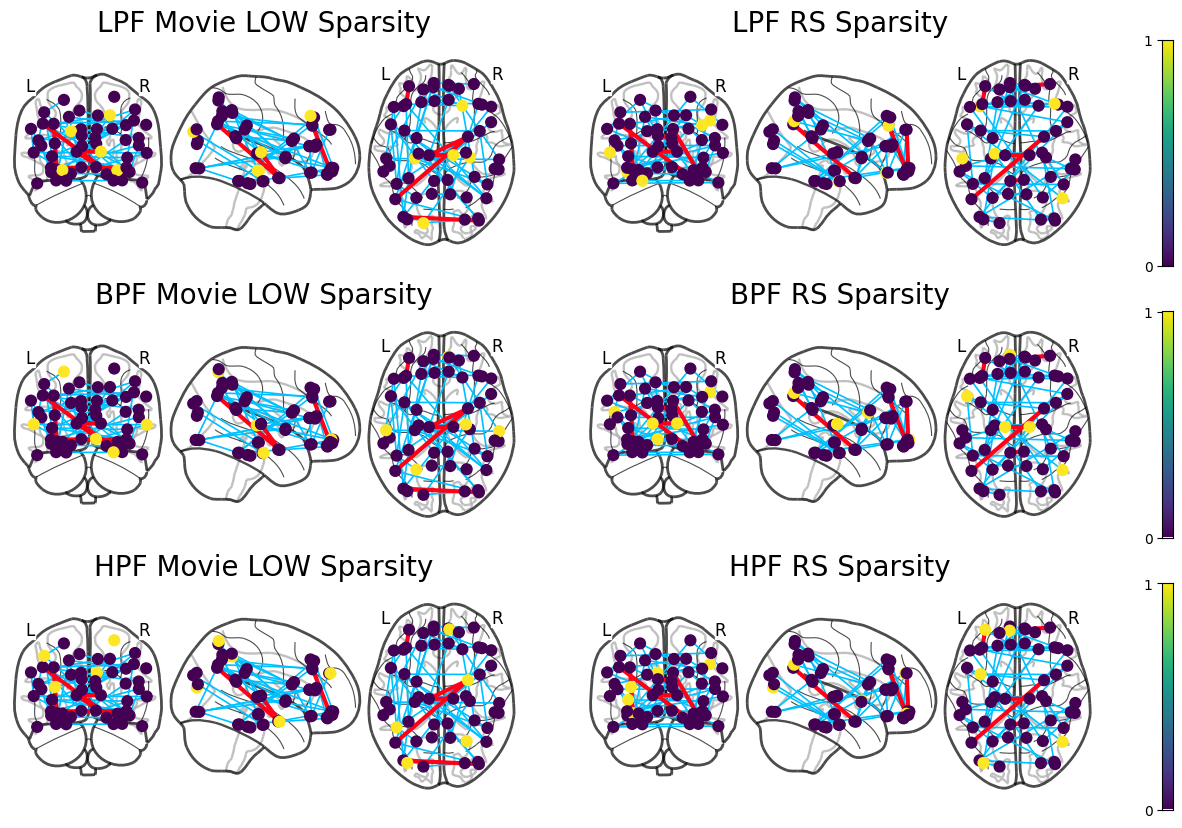

In [11]:
# Empathy LOW vs RS

# Sparsity

method = M-1

Graphs_plot_1 = Graphs_M1_LOW[:,:,method]
Graphs_plot_2 = Graphs_RS_Avg[:,:,method]
Graphs_plot_1 = thres(Graphs_plot_1,N,K)
Graphs_plot_2 = thres(Graphs_plot_2,N,K)

Graph_signal_1 = Data_M1_LOW[:,:,method]
Graph_signal_2 = Data_RS_Avg[:,:,method]

for i in range(B):
    Graph_signal_1[:,i] = thres_signal(Graph_signal_1[:,i],K)
    Graph_signal_2[:,i] = thres_signal(Graph_signal_2[:,i],K)

fig, axes = plt.subplots(nrows=B, ncols=3, figsize=(15,10), gridspec_kw={'width_ratios': [1,1,0.02]})

for i in range(B):
    nilearn.plotting.plot_connectome(Graphs_plot_1, layout, node_color=Graph_signal_1[:,i], node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[i][0])
    nilearn.plotting.plot_connectome(Graphs_plot_2, layout, node_color=Graph_signal_2[:,i], node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[i][1])
    axes[i][0].set_title(bands[i] + ' Movie LOW Sparsity',fontsize=20)
    axes[i][1].set_title(bands[i] + ' RS Sparsity',fontsize=20)

for i in range(B):
    axes[i][2].imshow(gradient, aspect='auto', cmap=cmap)
    axes[i][2].set_xlim(left=0, right=0.1)
    axes[i][2].get_xaxis().set_ticks([])
    axes[i][2].set_yticks([0,256])
    axes[i][2].set_yticklabels(['1','0'])
    
plt.savefig("EmpathyLOW_MovieVSResting_GFT.pdf", format="pdf", bbox_inches="tight")
plt.show()

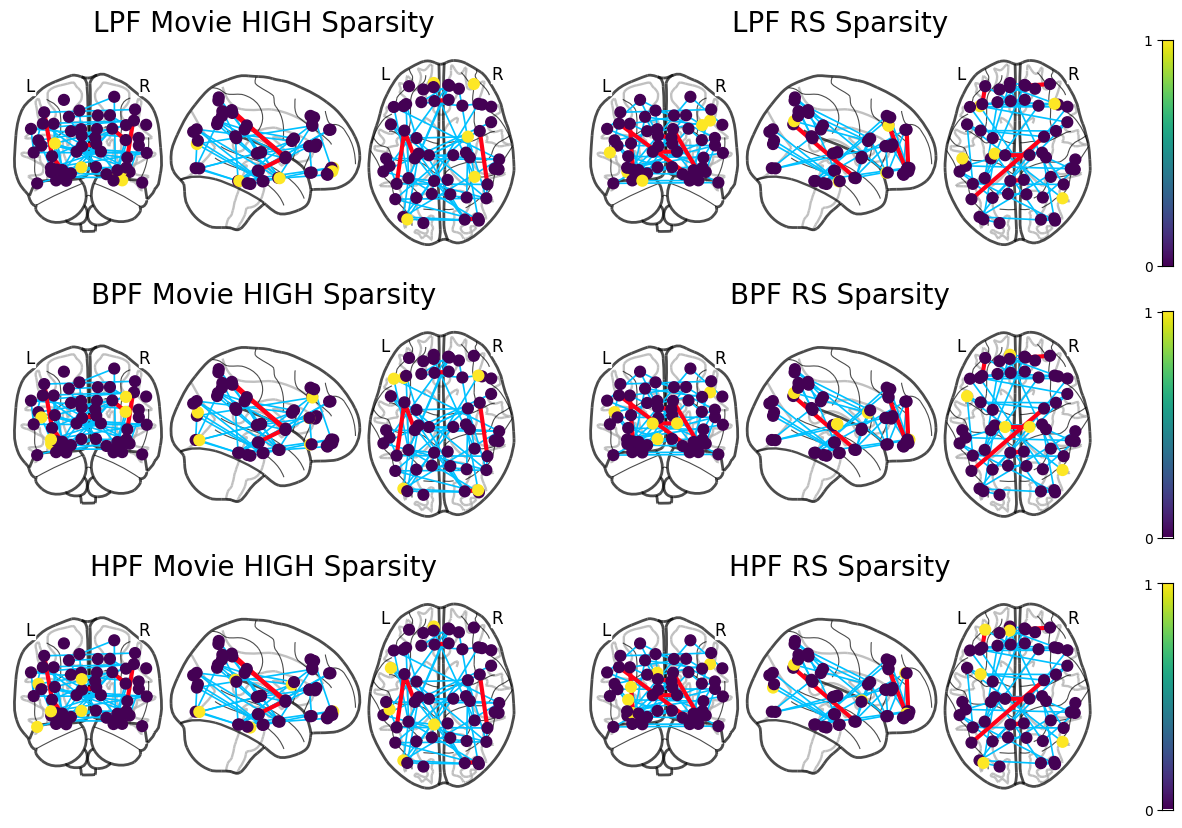

In [12]:
# Empathy HIGH vs RS

# Sparsity

method = M-1

Graphs_plot_1 = Graphs_M1_HIGH[:,:,method]
Graphs_plot_2 = Graphs_RS_Avg[:,:,method]
Graphs_plot_1 = thres(Graphs_plot_1,N,K)
Graphs_plot_2 = thres(Graphs_plot_2,N,K)

Graph_signal_1 = Data_M1_HIGH[:,:,method]
Graph_signal_2 = Data_RS_Avg[:,:,method]

for i in range(B):
    Graph_signal_1[:,i] = thres_signal(Graph_signal_1[:,i],K)
    Graph_signal_2[:,i] = thres_signal(Graph_signal_2[:,i],K)

fig, axes = plt.subplots(nrows=B, ncols=3, figsize=(15,10), gridspec_kw={'width_ratios': [1,1,0.02]})

for i in range(B):
    nilearn.plotting.plot_connectome(Graphs_plot_1, layout, node_color=Graph_signal_1[:,i], node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[i][0])
    nilearn.plotting.plot_connectome(Graphs_plot_2, layout, node_color=Graph_signal_2[:,i], node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[i][1])
    axes[i][0].set_title(bands[i] + ' Movie HIGH Sparsity',fontsize=20)
    axes[i][1].set_title(bands[i] + ' RS Sparsity',fontsize=20)

for i in range(B):
    axes[i][2].imshow(gradient, aspect='auto', cmap=cmap)
    axes[i][2].set_xlim(left=0, right=0.1)
    axes[i][2].get_xaxis().set_ticks([])
    axes[i][2].set_yticks([0,256])
    axes[i][2].set_yticklabels(['1','0'])
    
plt.savefig("EmpathyHIGH_MovieVSResting_GFT.pdf", format="pdf", bbox_inches="tight")
plt.show()

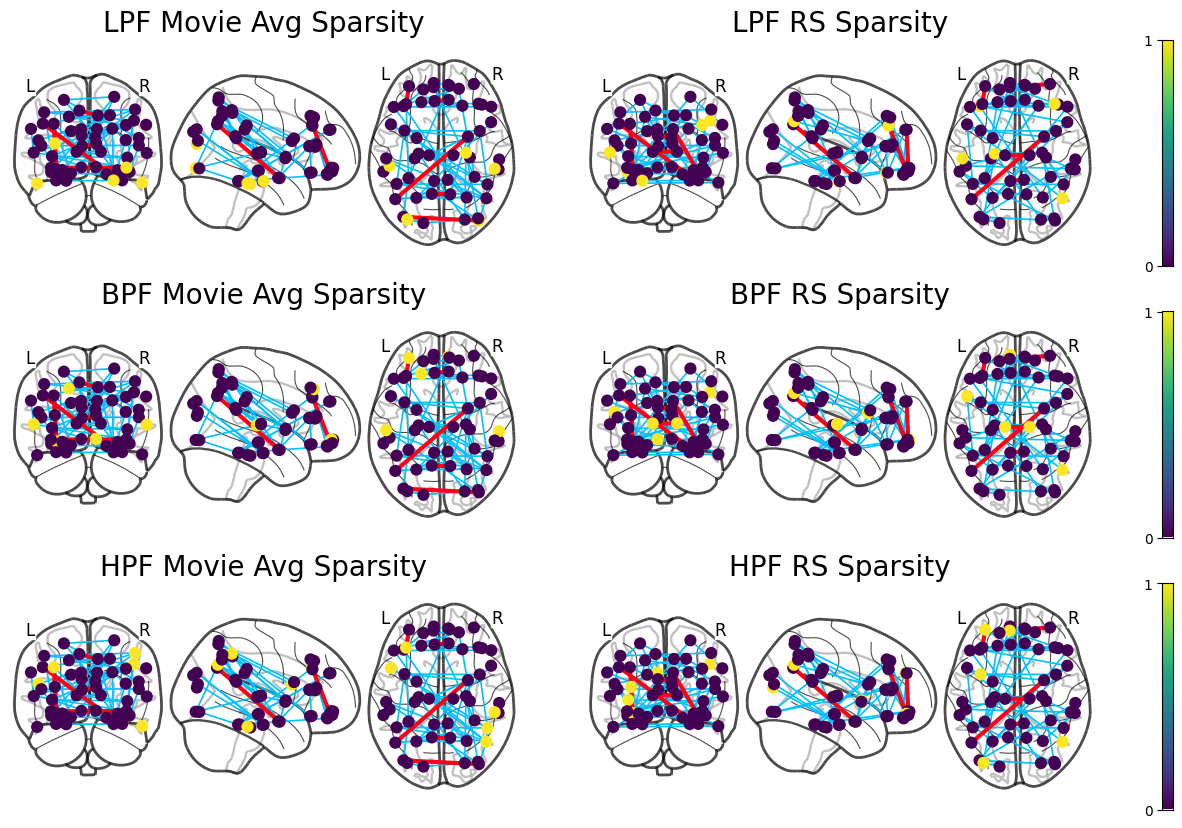

In [13]:
# Avg vs RS

# Sparsity

method = M-1

Graphs_plot_1 = Graphs_M1_Avg[:,:,method]
Graphs_plot_2 = Graphs_RS_Avg[:,:,method]
Graphs_plot_1 = thres(Graphs_plot_1,N,K)
Graphs_plot_2 = thres(Graphs_plot_2,N,K)

Graph_signal_1 = Data_M1_Avg[:,:,method]
Graph_signal_2 = Data_RS_Avg[:,:,method]

for i in range(B):
    Graph_signal_1[:,i] = thres_signal(Graph_signal_1[:,i],K)
    Graph_signal_2[:,i] = thres_signal(Graph_signal_2[:,i],K)

fig, axes = plt.subplots(nrows=B, ncols=3, figsize=(15,10), gridspec_kw={'width_ratios': [1,1,0.02]})

for i in range(B):
    nilearn.plotting.plot_connectome(Graphs_plot_1, layout, node_color=Graph_signal_1[:,i], node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[i][0])
    nilearn.plotting.plot_connectome(Graphs_plot_2, layout, node_color=Graph_signal_2[:,i], node_size=60, 
                         display_mode='ortho', annotate=True, edge_cmap=colormap, axes=axes[i][1])
    axes[i][0].set_title(bands[i] + ' Movie Avg Sparsity',fontsize=20)
    axes[i][1].set_title(bands[i] + ' RS Sparsity',fontsize=20)

for i in range(B):
    axes[i][2].imshow(gradient, aspect='auto', cmap=cmap)
    axes[i][2].set_xlim(left=0, right=0.1)
    axes[i][2].get_xaxis().set_ticks([])
    axes[i][2].set_yticks([0,256])
    axes[i][2].set_yticklabels(['1','0'])
    
plt.savefig("Avg_MovieVSResting_GFT.pdf", format="pdf", bbox_inches="tight")
plt.show()